In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAT/프로젝트/data/combined_data (1).csv')

In [4]:
df['FTHG']

0        2
1        0
2        1
3        0
4        2
        ..
14502    0
14503    3
14504    0
14505    0
14506    0
Name: FTHG, Length: 14507, dtype: int64

In [10]:
df['FTR'].value_counts()

FTR
H    6434
A    4429
D    3644
Name: count, dtype: int64

## EDA





## Overall

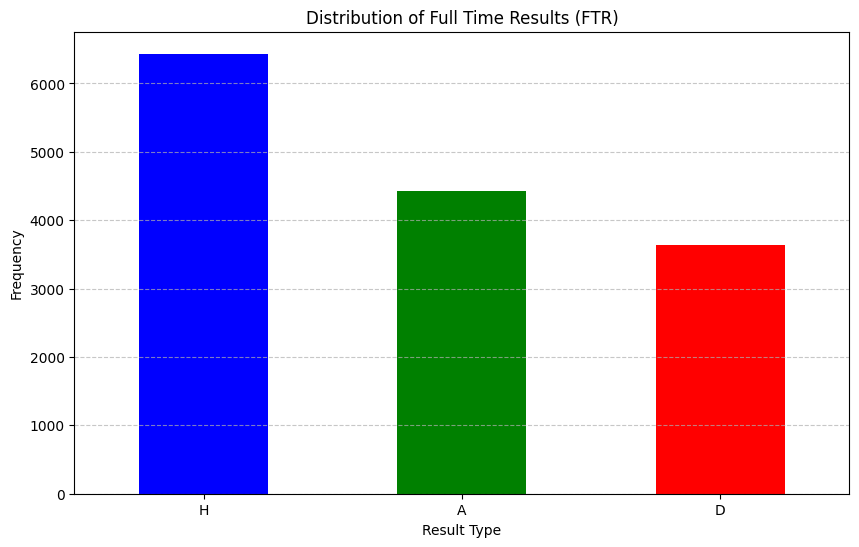

In [6]:
# Taget = FTR, FTR 개수를 막대그래프로 시각화

# Count the occurrences of each category in 'FTR'
ftr_counts = df['FTR'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR)')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# 경기 결과
df['FTR'].value_counts()

FTR
H    6434
A    4429
D    3644
Name: count, dtype: int64

역시 홈팀이 이기는 경우가 더 많다.

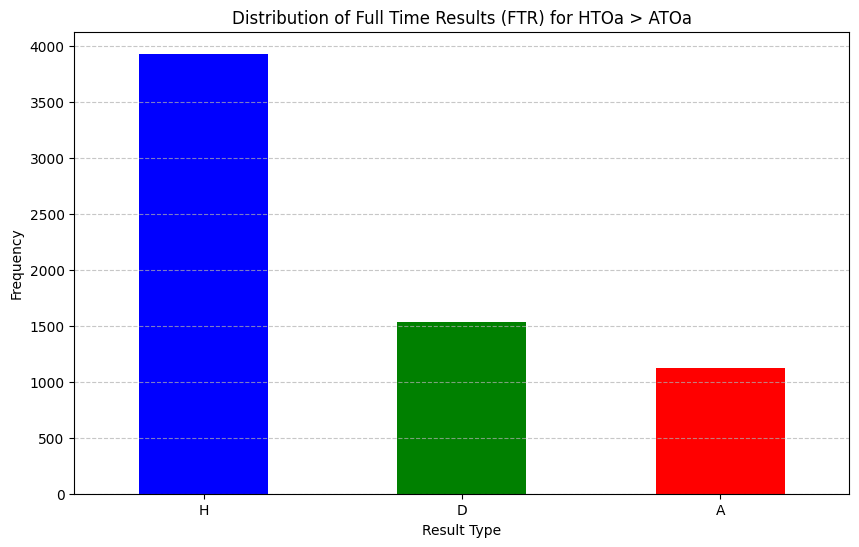

In [12]:
# 홈팀의 FIFA overall이 원정팀보다 FIFA overall이 높은 경우만 따로 추출
filtered_data = df[df['HTOa'] > df['ATOa']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HTOa > ATOa')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

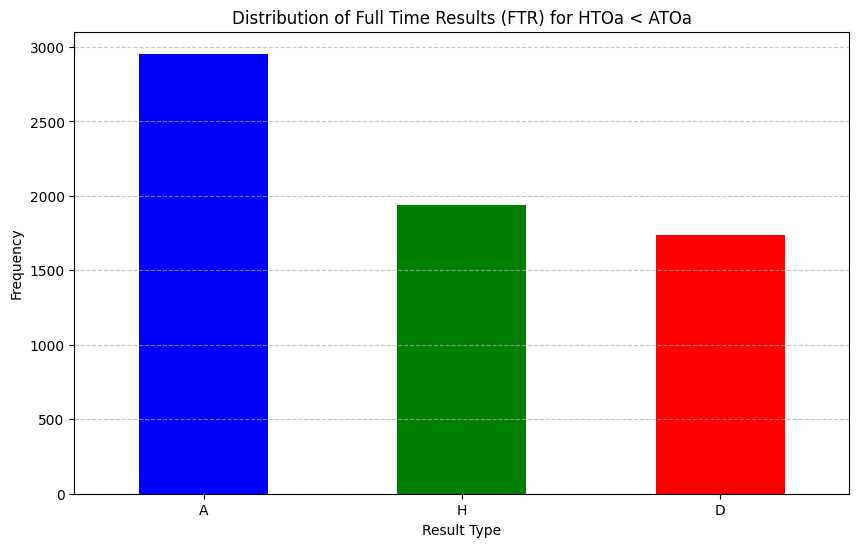

In [13]:
# 원정팀이 홈팀보다 overall 수치가 더 높은 행들만 추출

filtered_data = df[df['HTOa'] < df['ATOa']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HTOa < ATOa')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

홈팀, 원정팀 할 거 없이 두 팀 중 overall이 더 높은 경우 이길 확률이 더 높다.

다만 원정팀 overall이 더 높은 전제 하에 무승부 경기는 제외하고 원정팀이 이기는 경우 대비 홈팀이 이기는 경우의 확률이 60% 이상이다. 원정팀이 overall이 더 높긴해도 홈팀이 이기는 경우가 생각보다 많이 존재한다.

홈팀의 overall이 높은 경우에는 홈팀이 이기는 경우가 압도적으로 높기 때문에 예측이 수월할 수 있다.

그러나 원정팀의 overall이 더 높은 경우에는 홈팀이 이기는 확률을 적지 않기 때문에 예측하는데 어려움이 있을 수 있다.

이를 고려한다면 원정팀이 홈팀보다 overall이 더 높은 경우는 따로 추출해 모델링을 시도해 볼 수 있을 것 같다.

## Date

In [ ]:
# date 컬럼을 datetime 모듈을 활용해 년,월,일 로 쪼개기

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
# month를 기준으로 groupby하기
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Div         14507 non-null  object        
 1   Date        14507 non-null  datetime64[ns]
 2   HomeTeam    14507 non-null  object        
 3   AwayTeam    14507 non-null  object        
 4   HTOa        14507 non-null  int64         
 5   ATOa        14507 non-null  int64         
 6   HTAt        14507 non-null  int64         
 7   ATAt        14507 non-null  int64         
 8   HTMid       14507 non-null  int64         
 9   ATMid       14507 non-null  int64         
 10  HTDef       14507 non-null  int64         
 11  ATDef       14507 non-null  int64         
 12  HomeSquad   14507 non-null  int64         
 13  AwaySquad   14507 non-null  int64         
 14  HomeAvgAge  14507 non-null  int64         
 15  AwayAvgAge  14507 non-null  int64         
 16  HomeMV      14507 non-

In [ ]:
grouped_data = df.groupby('month')['FTR'].value_counts().unstack(fill_value=0)

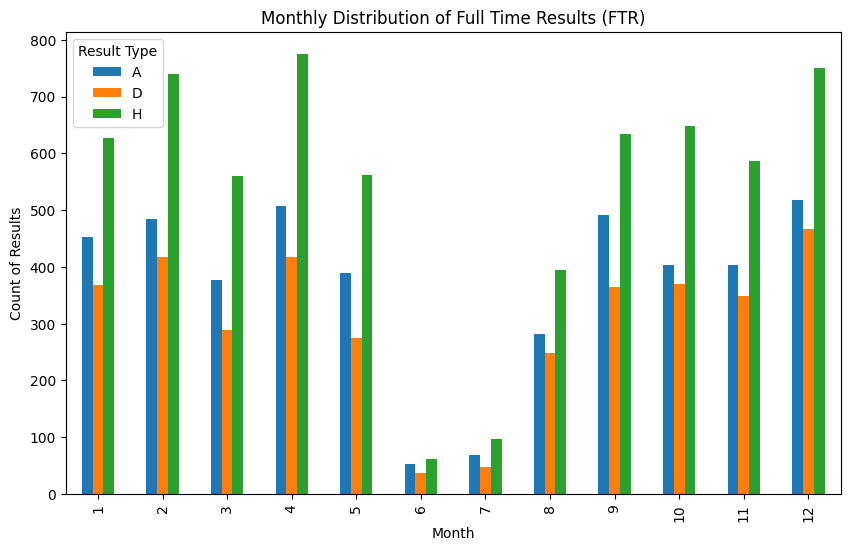

In [ ]:
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Distribution of Full Time Results (FTR)')
plt.xlabel('Month')
plt.ylabel('Count of Results')
plt.legend(title='Result Type')
plt.show()

In [ ]:
# 월별 H, A, D 비율

df.groupby('month')['FTR'].value_counts(normalize=True)

month  FTR
1      H      0.433011
       A      0.312845
       D      0.254144
2      H      0.450610
       A      0.295122
       D      0.254268
3      H      0.457143
       A      0.307755
       D      0.235102
4      H      0.455882
       A      0.298824
       D      0.245294
5      H      0.458401
       A      0.317292
       D      0.224307
6      H      0.407895
       A      0.348684
       D      0.243421
7      H      0.454976
       A      0.322275
       D      0.222749
8      H      0.427027
       A      0.304865
       D      0.268108
9      H      0.425789
       A      0.329752
       D      0.244459
10     H      0.456017
       A      0.284307
       D      0.259676
11     H      0.438295
       A      0.301421
       D      0.260284
12     H      0.432776
       A      0.298327
       D      0.268898
Name: proportion, dtype: float64

월별 경기결과를 시각화해본 결과 월마다 홈팀 승, 원정팀 승, 무승부 비율이 크게 다르진 않으나 원정팀의 승리 비율이 30%가 넘지 않는 달이 10, 11, 12, 2월 달이었다.

In [ ]:
df['dayofweek'] = df['Date'].dt.dayofweek #요일 (월 = 0)

In [ ]:
df['dayofweek'].value_counts() # 주중보다는 주말에 경기수가 훨씬 더 많았다.

dayofweek
5    6139
6    5149
2    1059
4     883
0     573
1     467
3     237
Name: count, dtype: int64

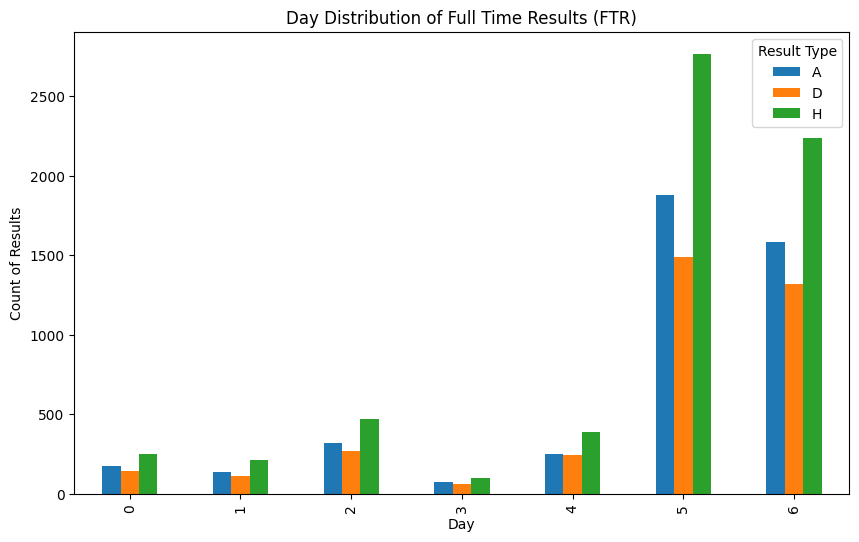

In [ ]:
# 요일별 H, D, A 분포

grouped_data = df.groupby('dayofweek')['FTR'].value_counts().unstack(fill_value=0)

grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Day Distribution of Full Time Results (FTR)')
plt.xlabel('Day')
plt.ylabel('Count of Results')
plt.legend(title='Result Type')
plt.show()

In [ ]:
df.groupby('dayofweek')['FTR'].value_counts(normalize=True)

dayofweek  FTR
0          H      0.439791
           A      0.305410
           D      0.254799
1          H      0.462527
           A      0.293362
           D      0.244111
2          H      0.441926
           A      0.304060
           D      0.254013
3          H      0.426160
           A      0.320675
           D      0.253165
4          H      0.441676
           A      0.284258
           D      0.274066
5          H      0.450888
           A      0.306402
           D      0.242711
6          H      0.434842
           A      0.308215
           D      0.256943
Name: proportion, dtype: float64

요일별 경기 결과를 확인해봤을 때 기본적으로 홈팀의 경기 승률이 40%가 넘는다.

In [ ]:
# 전반기 후반기로 나누었을 때 경기 결과
df['Period'] = df['Date'].dt.month.apply(lambda x: 'Second Half' if x <= 6 else 'First Half')

In [ ]:
df['Period'].value_counts()

Period
Second Half    7391
First Half     7116
Name: count, dtype: int64

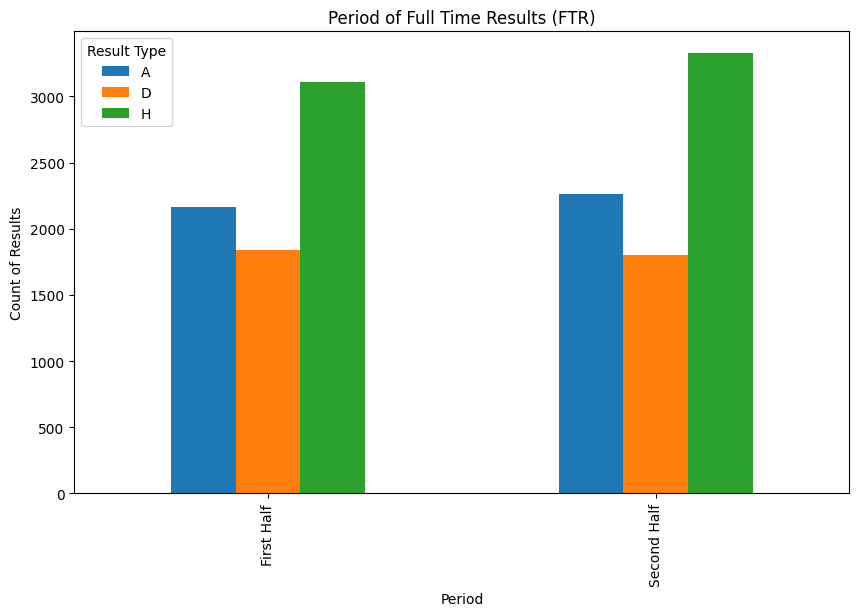

In [ ]:
grouped_data = df.groupby('Period')['FTR'].value_counts().unstack(fill_value=0)

grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Period of Full Time Results (FTR)')
plt.xlabel('Period')
plt.ylabel('Count of Results')
plt.legend(title='Result Type')
plt.show()

날짜를 전반기, 후반기를 기준으로 나눴을 때 차이는 거의 없었다.

In [ ]:
# 홈팀 배당률 평균
columns_to_average_h = ['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'PSCH']
df['h_average_odds'] = df[columns_to_average_h].mean(axis=1)

# Display the first few rows of the dataframe including the new 'average_odds' column
df[['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'PSCH', 'h_average_odds']].head()

,B365H,BWH,IWH,PSH,WHH,VCH,PSCH,average_odds
0,1.25,1.25,1.30,1.26,1.25,1.25,1.29,1.264286
1,3.20,2.90,2.90,3.14,3.10,3.20,3.11,3.078571
2,1.36,1.40,1.33,1.37,1.36,1.36,1.45,1.375714
3,2.50,2.50,2.30,2.48,2.60,2.55,2.31,2.462857
4,1.95,1.95,2.00,1.95,1.95,1.95,2.01,1.965714


In [ ]:
# 원정팀 배당률 평균
columns_to_average_a = ['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'PSCA']
df['a_average_odds'] = df[columns_to_average_a].mean(axis=1)

# Display the first few rows of the dataframe including the new 'average_odds' column
df[['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'PSCA', 'a_average_odds']].head()

,B365A,BWA,IWA,PSA,WHA,VCA,PSCA,a_average_odds
0,15.0,12.00,9.0,14.01,12.0,10.50,12.75,12.180000
1,2.4,2.40,2.3,2.46,2.4,2.40,2.47,2.404286
2,11.0,9.00,8.0,10.60,9.0,10.00,8.25,9.407143
3,3.1,2.85,2.9,3.22,2.9,3.12,3.59,3.097143
4,4.5,3.90,3.6,4.55,4.2,4.75,4.51,4.287143


In [ ]:
# 무승부 배당률 평균
columns_to_average_d = ['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'PSCD']
df['d_average_odds'] = df[columns_to_average_d].mean(axis=1)

# Display the first few rows of the dataframe including the new 'average_odds' column
df[['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'PSCD', 'd_average_odds']].head()

,B365D,BWD,IWD,PSD,WHD,VCD,PSCD,d_average_odds
0,6.5,5.50,5.0,6.45,5.5,6.25,5.90,5.871429
1,3.4,3.20,3.3,3.38,3.1,3.40,3.40,3.311429
2,5.0,4.75,5.0,5.10,4.5,5.20,4.81,4.908571
3,3.3,3.10,3.3,3.26,3.0,3.20,3.24,3.200000
4,3.5,3.30,3.3,3.47,3.2,3.30,3.34,3.344286


배당률은 경기 내적인 변수가 아니기 때문에 제외한다.

## xG

In [ ]:
# HxG, AxG, HxA, AxA 평균값 구하기

# Columns of interest
columns_to_average = ['HxG', 'AxG', 'HxA', 'AxA']

# Initialize an empty dictionary to store averages
averages = {}

# Loop through each column and calculate the mean
for column in columns_to_average:
    averages[column] = df[column].mean()

# Print the average values
for key, value in averages.items():
    print(f"Average {key}: {value}")

Average HxG: 1.5086916660922312
Average AxG: 1.1901102915833737
Average HxA: 1.0659052675124105
Average AxA: 0.8541485107556536


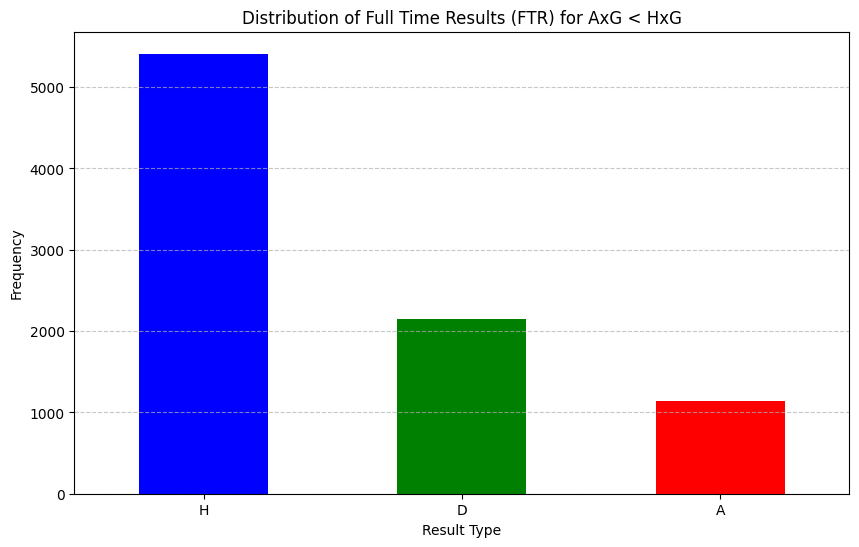

In [ ]:
filtered_data = df[df['AxG'] < df['HxG']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for AxG < HxG')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

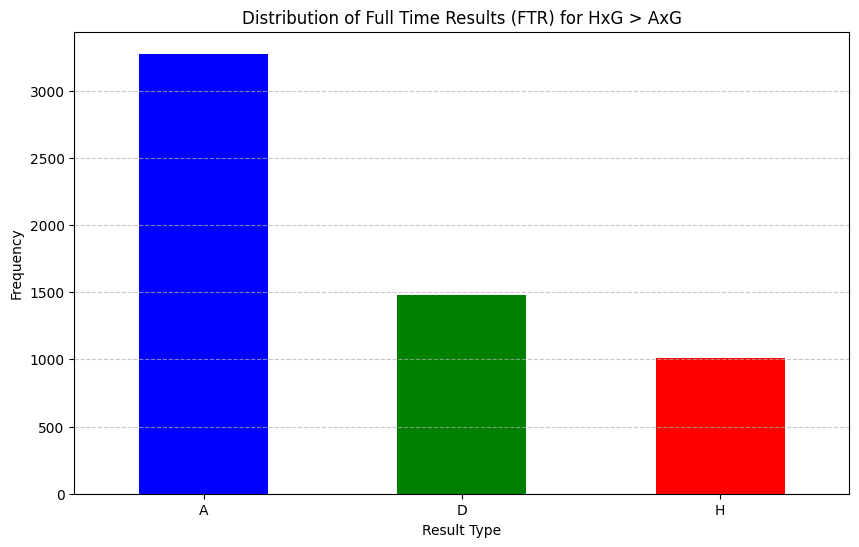

In [ ]:
filtered_data = df[df['HxG'] < df['AxG']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HxG < AxG')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

홈팀, 원정팀 상관없이 xG 값이 높은 팀이 더 높은 확률로 승리한다.

In [ ]:
df.columns



Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'HTOa', 'ATOa', 'HTAt', 'ATAt',
       'HTMid', 'ATMid', 'HTDef', 'ATDef', 'HomeSquad', 'AwaySquad',
       'HomeAvgAge', 'AwayAvgAge', 'HomeMV', 'AwayMV', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA', 'AxA', 'HxPTS', 'AxPTS',
       'HPPDA', 'APPDA', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'PSCH', 'PSCD', 'PSCA', 'year', 'month', 'day', 'dayofweek',
       'Period'],
      dtype='object')

## AvgAge

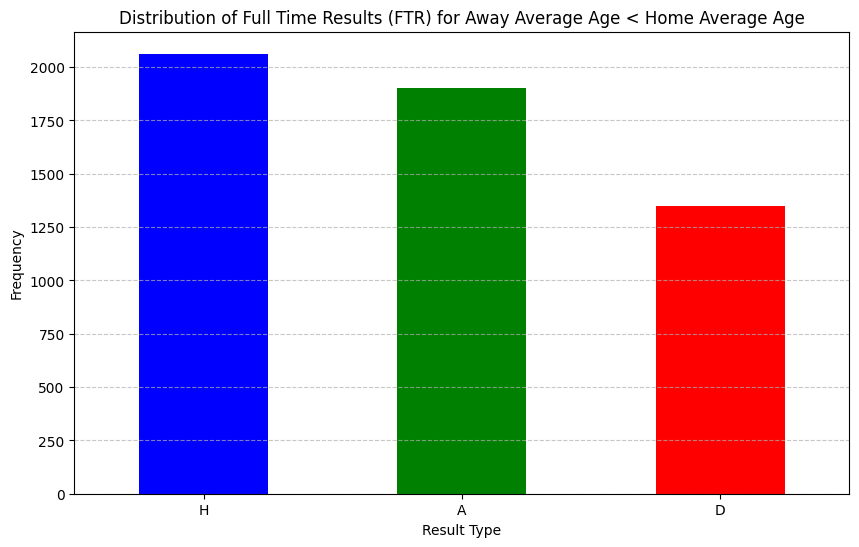

In [ ]:
# 홈팀 평균 나이가 원정팀의 평균 나이보다 많은 경우

filtered_data = df[df['HomeAvgAge'] > df['AwayAvgAge']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for Away Average Age < Home Average Age')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

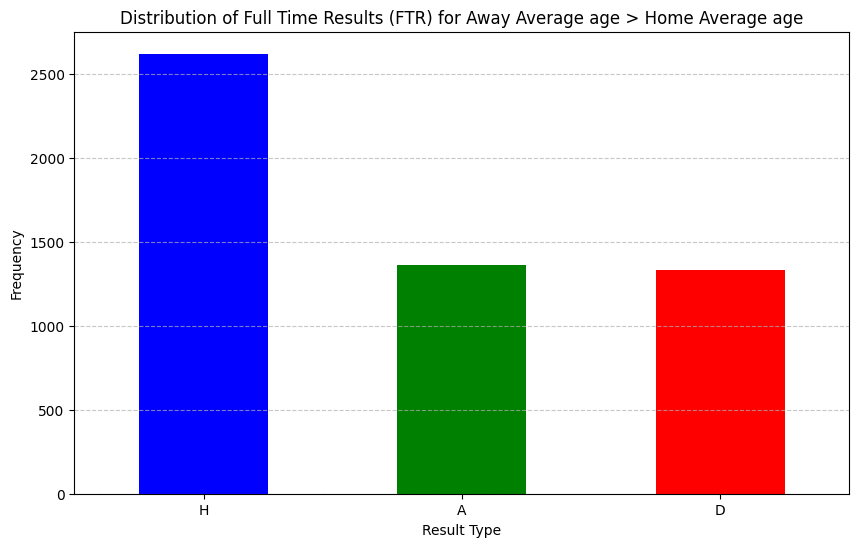

In [ ]:
filtered_data = df[df['HomeAvgAge'] < df['AwayAvgAge']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for Away Average age > Home Average age')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

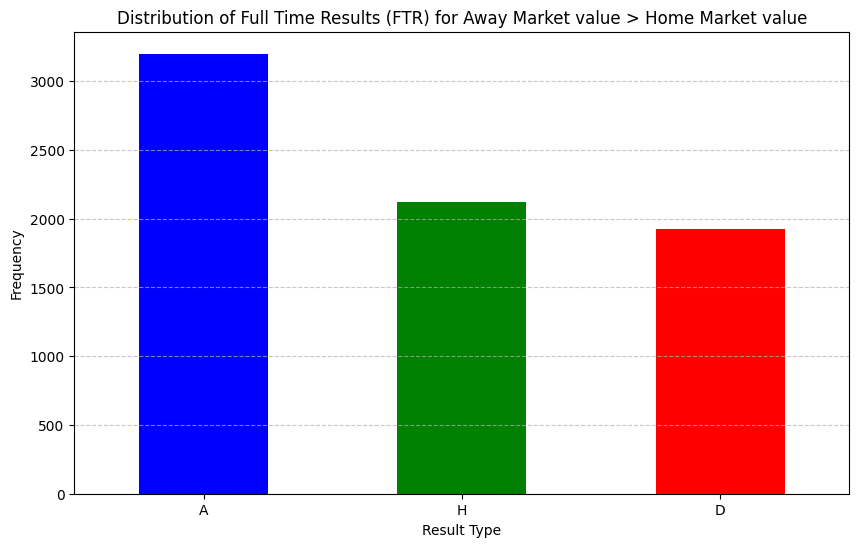

In [ ]:
# Market value

filtered_data = df[df['HomeMV'] < df['AwayMV']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for Away Market value > Home Market value')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

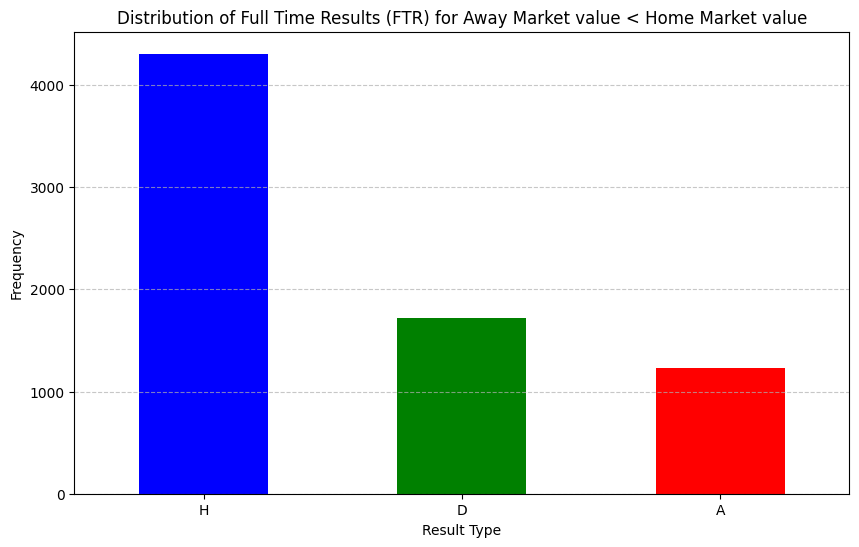

In [ ]:
# Market value

filtered_data = df[df['HomeMV'] > df['AwayMV']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for Away Market value < Home Market value')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## heatmap

In [ ]:
mapping = {'H': 0, 'A': 1, 'D': 2}  # 변환을 위한 매핑 딕셔너리
df['FTR'] = df['FTR'].replace(mapping)

In [ ]:
df['FTR'].value_counts()

FTR
0    6434
1    4429
2    3644
Name: count, dtype: int64